# Heart Disease Risk Prediction using Ensemble Learning

### Problem Statement:

Heart disease is a major global health concern, making early detection essential for effective treatment. Conventional diagnostic techniques depend on medical tests and expert evaluation, which can be time-intensive and susceptible to human error. This project focuses on creating a machine learning model to predict the likelihood of heart disease based on key medical factors, including age, blood pressure, cholesterol levels, and other health indicators.


The primary challenge lies in the complexity and variability of heart disease symptoms, which differ among individuals. By leveraging machine learning algorithms, we can analyze patterns in large datasets and improve predictive accuracy. The proposed model will utilize supervised learning techniques, trained on historical medical data, to provide reliable risk assessments. This approach can enhance decision-making for healthcare professionals and enable proactive measures to prevent severe complications.


Furthermore, the integration of such predictive models into healthcare systems can reduce the burden on medical professionals by streamlining the diagnostic process. With the rising availability of electronic health records and advancements in computational power, machine learning-based heart disease prediction has the potential to significantly impact public health by facilitating early detection and personalized treatment strategies.




### Solution Approach:

The proposed approach leverages an ensemble learning method using a Voting Classifier that combines multiple base models to improve predictive accuracy and robustness. The key steps include:
- Data Preprocessing: Handling missing values and feature scaling.
- Model Selection: Using an ensemble of Logistic Regression, Random Forest (with and without Hyperparameter tuning), SVM, and XGBoost.
- Soft Voting Classifier: Combining predictions of base models using probability-weighted voting.
- Evaluation & Optimization: Assessing model performance using Accuracy, Precision, Recall, F1-score, and MCC, with hyperparameter tuning for optimal performance.


### About the Dataset:

Dataset Link (Kaggle): https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

The dataset used in this project contains relevant medical attributes such as age, cholesterol levels, blood pressure, and ECG readings. A summary of the dataset is presented in the table below:

| Feature   | Description                                           |
|-----------|-------------------------------------------------------|
| age       | Patient age in years                                  |
| sex       | Gender of the patient (0 = Female, 1 = Male)          |
| cp        | Chest pain type (categorical: 0-3)                    |
| trestbps  | Resting blood pressure (mm Hg)                        |
| chol      | Serum cholesterol level (mg/dL)                       |
| fbs       | Fasting blood sugar (>120 mg/dL, 1 = True, 0 = False) |
| restecg   | Resting electrocardiographic results (0-2)            |
| thalach   | Maximum heart rate achieved                           |
| exang     | Exercise-induced angina (1 = Yes, 0 = No)             |
| oldpeak   | ST depression induced by exercise                     |
| slope     | Slope of peak exercise ST segment (0-2)               |
| ca        | Number of major vessels colored by fluoroscopy (0-4)  |
| thal      | Thalassemia type (0-3)                                |
| target    | Presence (1) or absence (0) of heart disease          |

- With 303 entries & a total 14 columns


### Install required libraries

In [4]:
%pip install numpy pandas matplotlib seaborn scikit-learn ipywidgets

   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.3 MB 1.8 MB/s eta 0:00:02
   ---------------------- ----------------- 1.3/2.3 MB 2.8 MB/s eta 0:00:01
   ----------------------------------- ---- 2.1/2.3 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Import required libraries

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (log_loss, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef)
from sklearn.ensemble import VotingClassifier

import pickle
import joblib
import ipywidgets as widgets
from IPython.display import display

In [6]:
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [7]:
data_path = 'dataset/heart_disease_data.csv'
data = pd.read_csv(data_path)

os.makedirs("output", exist_ok=True) # Output folder to save plots

### Exploratory Data Analysis (EDA)

In [8]:
# View first 5 rows
print("------- Data Frame -------\n", data.head(), sep="\n")

------- Data Frame -------

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [9]:
# Show complete information about no. of entries, no. of columns, non-null values, data types
print("------- Information -------\n") ; data.info()

------- Information -------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Show missing values present if any, in each column
missing_values = data.isnull().sum()
missing_values_non_zero = missing_values[missing_values != 0]
if missing_values_non_zero.empty:
    print("No missing values found.")
else:
    print("------- Missing Values -------\n", missing_values_non_zero, sep="\n")

No missing values found.


In [11]:
# Show Mean, Median, Standard Deviaiton, Min, Max, Quartiles of each column
print("------- Describe -------\n", data.describe(), sep="\n")

------- Describe -------

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
s

In [12]:
# Dataset parameters
feature_list = data.columns.tolist()
print("Columns in the DataFrame:", feature_list)

Columns in the DataFrame: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [13]:
# Outlier detection using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((data < lower_bound) | (data > upper_bound)).sum()
# Print outliers before handling
print("------- Outliers Before Handling -------\n", outliers)
# Handle outliers by capping (Winsorization/Capping)
# data = data.apply(lambda x: x.clip(lower=x.quantile(0.05), upper=x.quantile(0.95)), axis=0)
# Outliers after handling
# outliers_after_handling = ((data < lower_bound) | (data > upper_bound)).sum()
# print("------- Outliers After Handling -------\n", outliers_after_handling)

------- Outliers Before Handling -------
 age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          25
thal         2
target       0
dtype: int64


### Check the distribution of the target variable (assumed to be 'target')


In [14]:
# Binary Classes : Heart Disease Present or Absent
print("\n------- Target Value Counts -------", data['target'].value_counts(), sep="\n")


------- Target Value Counts -------
target
1    165
0    138
Name: count, dtype: int64


### Dataset Visualisation

#### Correlation Heatmap
- Provides insights into how different features in the dataset are related to each other and to the target variable (target)
- Helps in feature selection—strongly correlated features may carry redundant information, and the most relevant ones can be used for model training.
- Particularly, for the Logistic Regression & SVM models that are being used in this project


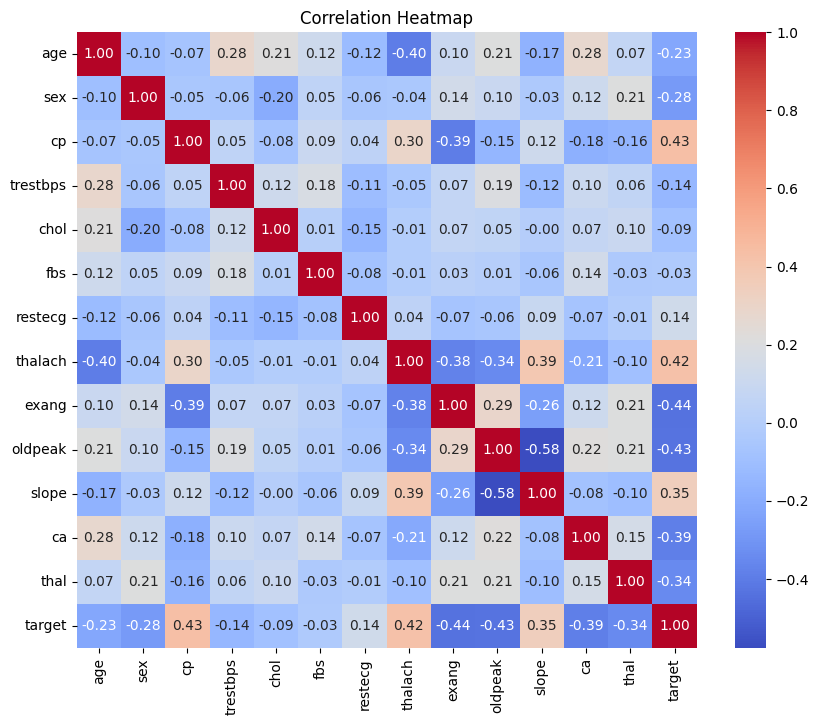

In [15]:
# Correlation Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig(f"output/correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

#### Feature Distribution

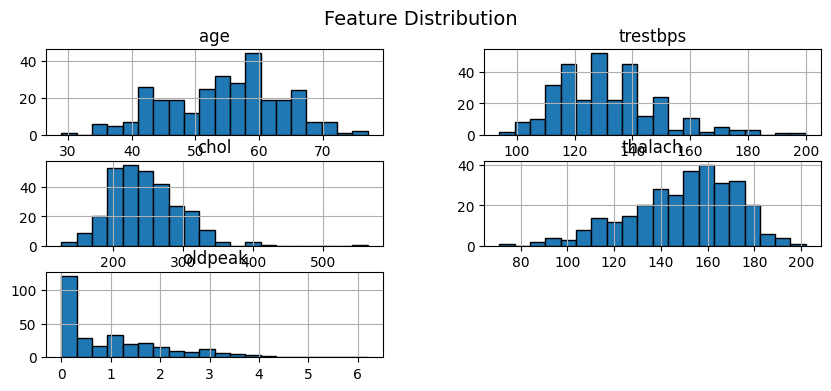

In [16]:
# Feature Distribution - Histograms
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[features].hist(figsize=(10, 4), bins=20, edgecolor='black')
plt.suptitle('Feature Distribution', fontsize=14)
plt.savefig(f"output/feature_distributions.png")
plt.show()

#### Target Distribution

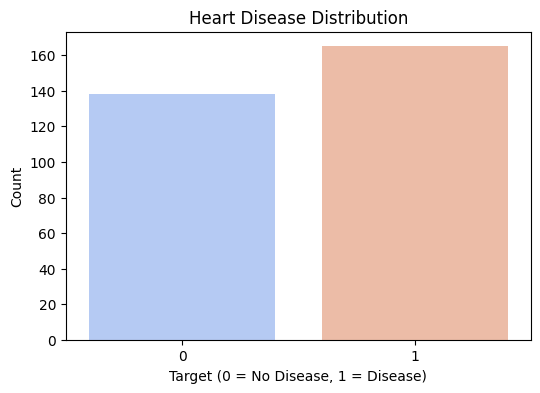

In [17]:
# Target Distribution - Bar Plot
feature = data['target']
plt.figure(figsize=(6, 4))
sns.countplot(x=feature, hue=feature, palette='coolwarm', legend=False)
plt.title("Heart Disease Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.savefig(f"output/target_distributions.png")
plt.show()

#### Boxplots

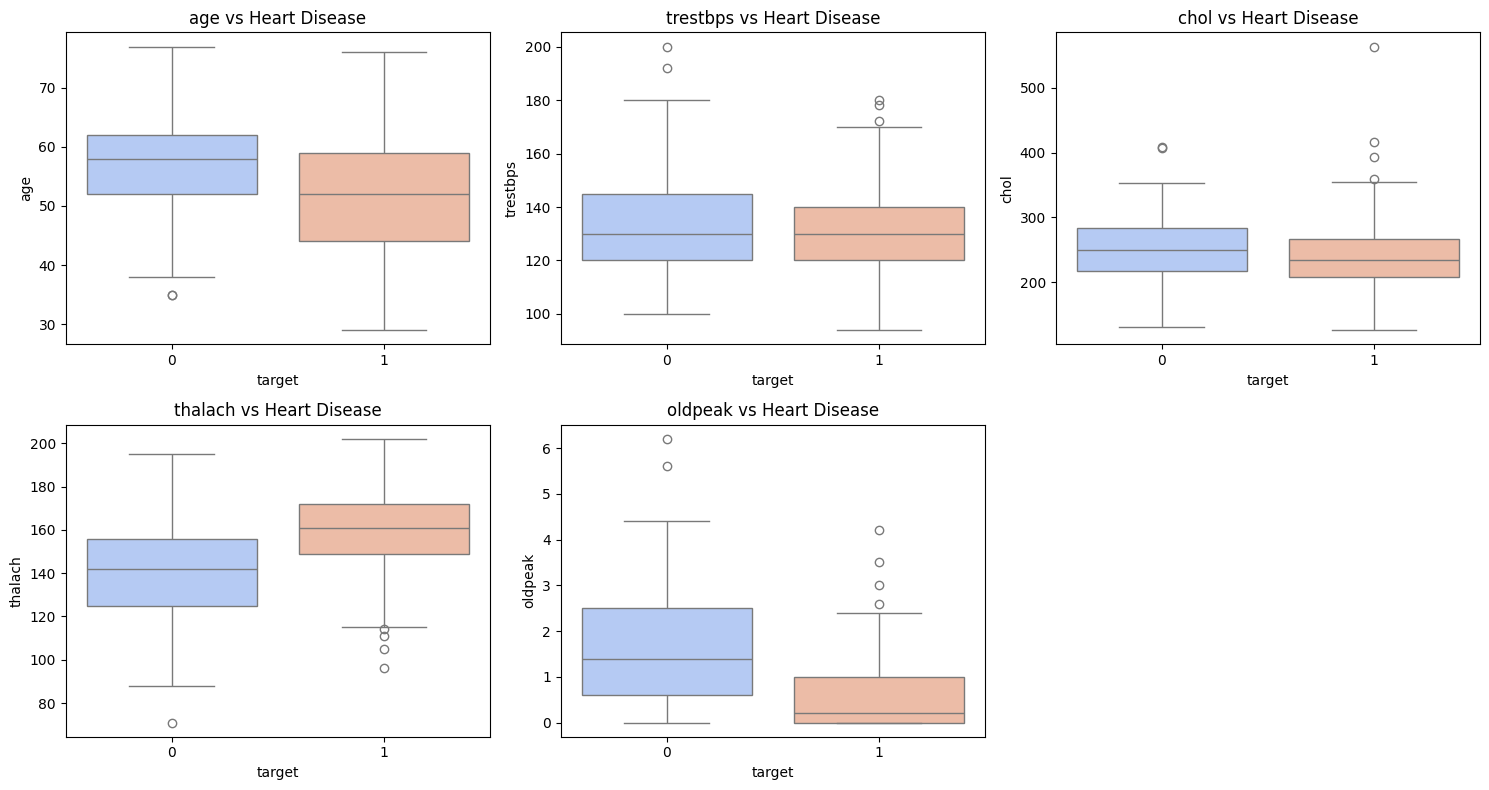

In [18]:
# Boxplots for Numerical Features
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i) # 2 rows, 3 columns layout
    sns.boxplot(x=data['target'], hue=data['target'], y=data[feature], palette='coolwarm', legend=False)
    plt.title(f'{feature} vs Heart Disease')
plt.tight_layout()
plt.savefig(f"output/boxplots.png")
plt.show()

### Train-Test Split & Normalisation
- Assuming no missing values; otherwise, imputation can be used

In [19]:
# Train-Test 80:20 split (80% training & 20% testing)
# Stratefy=y ; prevents class imbalance issued in ytrain & ytest
X, y = data.drop(columns='target'), data['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [20]:
# Normalize the Data
# Improves model performance & prevents feature dominance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

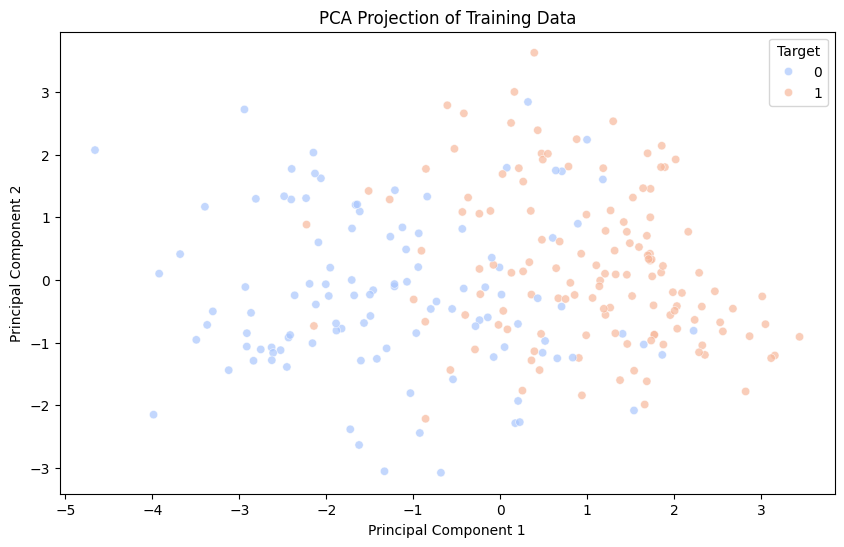

In [21]:
# Apply PCA (reduce to 2D for visualization)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot of data points in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Training Data")
plt.legend(title="Target")
plt.savefig(f"output/PCA_projection.png")
plt.show()

### Define Models to Compare

#### Justification for using each of the models:

1. Logistic Regression
    - Works well for linearly separable data and provides probabilistic interpretations.
    - Computationally efficient and less prone to overfitting with fewer features.

2. Random Forest
    - Reduces overfitting by averaging multiple decision trees (bagging).
    - Handles missing data and feature importance ranking well.

3. SVM (Support Vector Machine)
    - Effective for high-dimensional data and non-linearly separable cases using kernels.
    - Robust to outliers due to the use of support vectors.

4. XGBoost
    - Utilizes gradient boosting to minimize errors iteratively, improving accuracy.
    - Handles missing values and is highly optimized for speed and efficiency.
    - Works well with imbalanced datasets due to built-in regularization techniques.


In [22]:
# Random state = 42 ; used as a convention
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
}

### Model Evaluation

- TN (True Negative)
    - The model correctly predicted negative (No).
- FP (False Positives)
    - The model incorrectly predicted positive (Yes) when it was actually No (Type I Error).
- TP (True Positive)
    - The model correctly predicted positive (Yes).
- Accuracy = TP + TN / (TP + TN + FP + FN)
    - Overall correctness of the model.
- Precision = TP / (TP + FP)
    - No. of predicted positives that were actually positive.
- Recall (Sesitivity) = TP / (TP + FN)
    - Ability to detect positive cases (True Positive Rate).
- F1-Score = 2 *  Precision * Recall / (Precision + Recall)
    - Balance between precision and recall.
- MCC (Matthews Correlation Coefficient) = (TP * TN - FP * FN) / Square Root((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    - A balanced metric even for imbalanced datasets.
- Specificity = TN / (TN + FP)
    - Ability to detect negative cases (True Negative Rate).
- FPR (False Positive Rate) = FP / (FP + TN)
    - Probability of incorrectly predicting positive.
- FNR (False Negative Rate) = FN / (FN + TP)
    - Probability of missing a positive case.
- NPV (Negative Predictive Value) = TN / (TN + FP)
    - No. of predicted negatives that were actually negative
- FDR (False Discovery Rate) = FP / (TP + FP)
    - No. of predicted positives that were actually false.

In [23]:
def calculate_metrics(confusion_matrix):
    # Confusion_matrix is a 2x2 array: [[TN, FP], [FN, TP]]
    TN, FP, FN, TP = confusion_matrix.ravel()
    safe_division = lambda numerator, denominator: numerator / denominator if denominator > 0 else 0 # Prevents division by zero
    # Calculate metrics
    return {
        "Accuracy": safe_division(TP + TN, TP + TN + FP + FN),
        "Precision": safe_division(TP, TP + FP),
        "Recall": safe_division(TP, TP + FN),
        "F1-Score": safe_division(2 * safe_division(TP, TP + FP) * safe_division(TP, TP + FN),
                                  safe_division(TP, TP + FP) + safe_division(TP, TP + FN)),
        "MCC": safe_division((TP * TN) - (FP * FN), np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))),
        "Specificity": safe_division(TN, TN + FP),
        "FPR": safe_division(FP, TN + FP),
        "FNR": safe_division(FN, TP + FN),
        "NPV": safe_division(TN, TN + FN),
        "FDR": safe_division(FP, TP + FP)
    }

### Train & Evaluate Confusion Matrix Plots (for each model)

In [24]:
# Initialise results
results = []

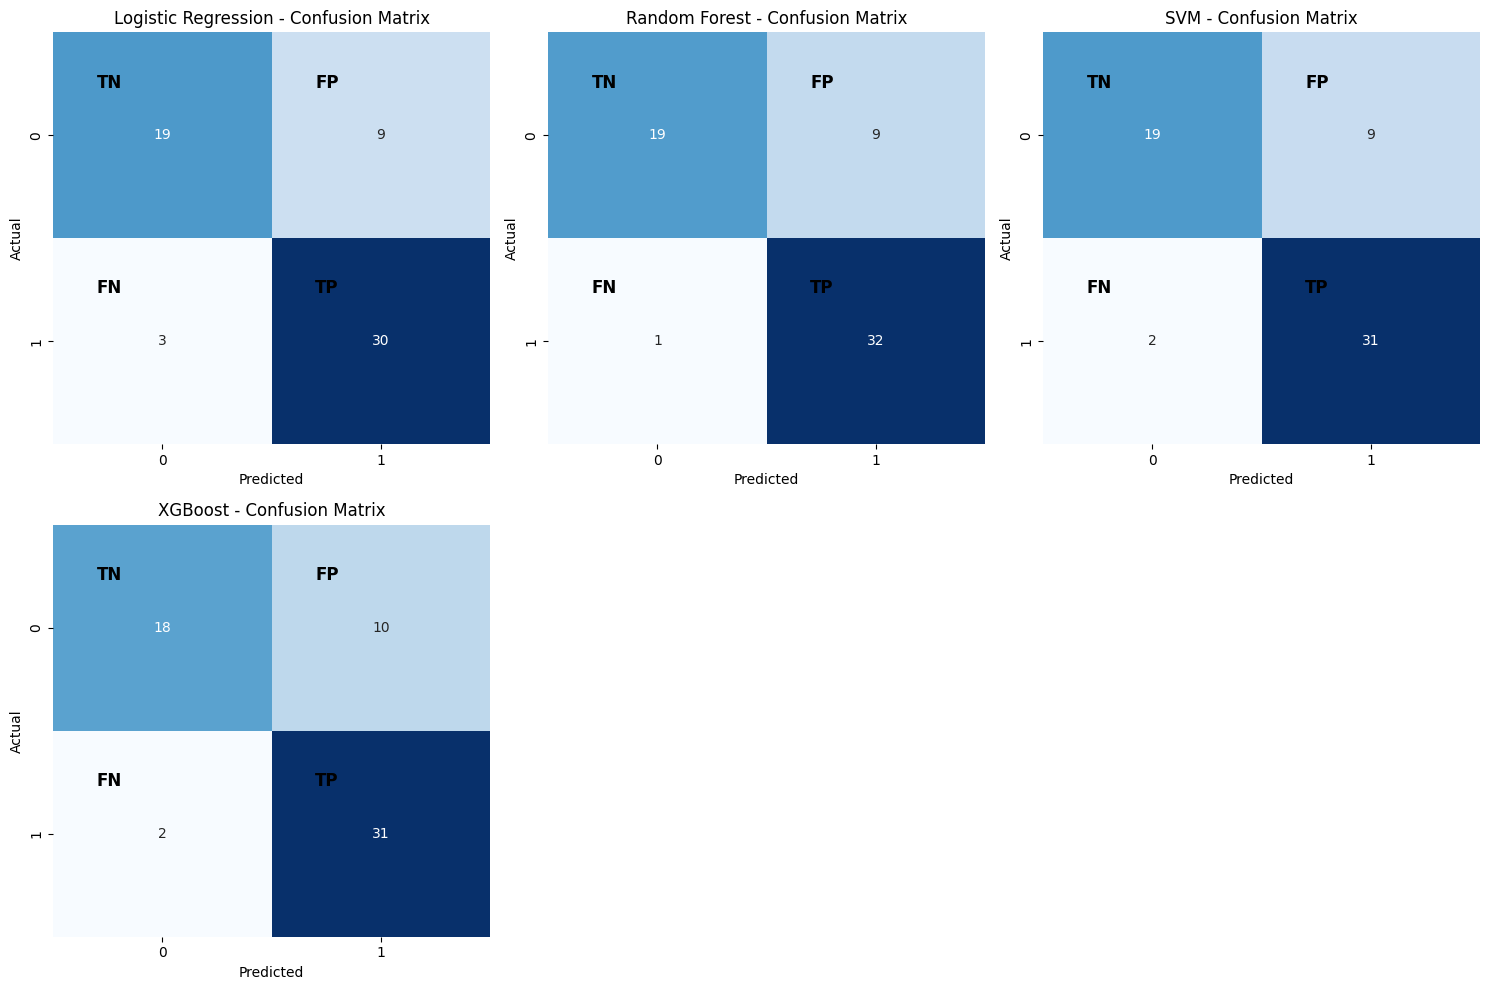

In [25]:
num_models = len(models)
rows = int(np.ceil(num_models / 3))
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    confusion = confusion_matrix(y_test, y_pred)
    metrics = calculate_metrics(confusion)
    results.append({
        "Model": name, **metrics, "Confusion Matrix": confusion
    })
    # Plot confusion matrix heatmap
    ax = axes[i]
    sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d", cbar=False, ax=ax)
    ax.text(0.2, 0.2, "TN", ha="left", va="top", color="black", fontsize=12, fontweight="bold")  # TN
    ax.text(1.2, 0.2, "FP", ha="left", va="top", color="black", fontsize=12, fontweight="bold")  # FP
    ax.text(0.2, 1.2, "FN", ha="left", va="top", color="black", fontsize=12, fontweight="bold")  # FN
    ax.text(1.2, 1.2, "TP", ha="left", va="top", color="black", fontsize=12, fontweight="bold")  # TP
    ax.set_title(f"{name} - Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    plt.savefig(f"output/confusion_matrix_{name.replace(' ', '_').lower()}.png", dpi=300, bbox_inches="tight")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### Hyperparameter Tuning of Random Forest (Using GridSearchCV)

- Process of finding the best set of hyperparameters for a machine learning model to improve its performance
- Unlike model parameters (like weights in neural networks), hyperparameters must be set before training.
- I focused on hyperparameter tuning of RandomForestClassifier because it had the highest accuracy among all the models (Logistic Regression, Random Forest, SVM, XGBoost).

#### GridSearchcv

- A method in sklearn that automates hyperparameter tuning by testing different hyperparameter values and selecting the best combination.
- Tries all possible combinations of hyperparameters.
- CV (Cross-Validation) means it splits the data into training & validation sets multiple times to ensure generalization.

Fitting 5 folds for each of 48 candidates, totalling 240 fits

----- Hyperparameter Tuning Results (Random Forest) -----
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 Score: 0.8545035835393197


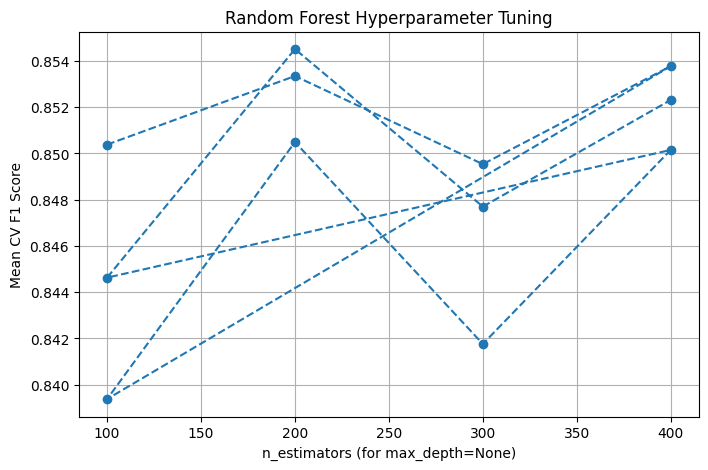


Random Forest (Tuned) - Confusion Matrix:
 [[20  8]
 [ 1 32]]


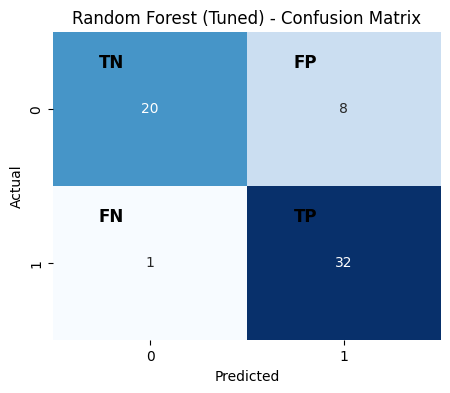

In [26]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Increase range for better generalization
    'max_depth': [10, 20, 30, None],  # Explore deeper trees
    'min_samples_split': [2, 5, 10],  # Prevents overfitting
}
rf = RandomForestClassifier(random_state=42) # Initialise Random Forest Classifier
# Grid Search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters & score
print("\n----- Hyperparameter Tuning Results (Random Forest) -----")
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

results_cv = pd.DataFrame(grid_search.cv_results_) # Convert GridSearchCV results into a DataFrame
results_none = results_cv[results_cv['param_max_depth'].isnull()] # Filter results for max_depth == None

# Plot n_estimators vs. F1 Score (for max_depth=None)
plt.figure(figsize=(8, 5))
plt.plot(results_none['param_n_estimators'], results_none['mean_test_score'], marker='o', linestyle='--')
plt.xlabel("n_estimators (for max_depth=None)")
plt.ylabel("Mean CV F1 Score")
plt.title("Random Forest Hyperparameter Tuning")
plt.grid(True)
plt.savefig("output/rf_hyperparameter_tuning.png", dpi=300, bbox_inches='tight')
plt.show()

# Get the best model
best_rf = grid_search.best_estimator_
# Train & evaluate the best model
best_rf.fit(X_train_scaled, y_train)
y_pred_rf_tuned = best_rf.predict(X_test_scaled)
# Compute classification metrics
confusion_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
metrics_rf_tuned = calculate_metrics(confusion_rf_tuned)
results.append({
    "Model": "Random Forest (Tuned)",  **metrics_rf_tuned, "Confusion Matrix": confusion_rf_tuned
})
# Print classification report & confusion matrix
print("\nRandom Forest (Tuned) - Confusion Matrix:\n", confusion_rf_tuned)
# Plot & save confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_rf_tuned, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.text(0.3, 0.2, "TN", ha="center", va="center", color="black", fontsize=12, fontweight="bold")  # TN
plt.text(1.3, 0.2, "FP", ha="center", va="center", color="black", fontsize=12, fontweight="bold")  # FP
plt.text(0.3, 1.2, "FN", ha="center", va="center", color="black", fontsize=12, fontweight="bold")  # FN
plt.text(1.3, 1.2, "TP", ha="center", va="center", color="black", fontsize=12, fontweight="bold")  # TP
plt.title("Random Forest (Tuned) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("output/confusion_matrix_rf_tuned.png", dpi=300, bbox_inches="tight")
plt.show()

### Comparison of Models & their Metrics


------- Model Comparison Table -------
                    Model  Accuracy  Precision    Recall  F1-Score       MCC  \
4  Random Forest (Tuned)  0.852459   0.800000  0.969697  0.876712  0.717367   
1          Random Forest  0.836066   0.780488  0.969697  0.864865  0.688151   
2                    SVM  0.819672   0.775000  0.939394  0.849315  0.648128   
0    Logistic Regression  0.803279   0.769231  0.909091  0.833333  0.609846   
3                XGBoost  0.803279   0.756098  0.939394  0.837838  0.618072   

   Specificity       FPR       FNR       NPV       FDR  
4     0.714286  0.285714  0.030303  0.952381  0.200000  
1     0.678571  0.321429  0.030303  0.950000  0.219512  
2     0.678571  0.321429  0.060606  0.904762  0.225000  
0     0.678571  0.321429  0.090909  0.863636  0.230769  
3     0.642857  0.357143  0.060606  0.900000  0.243902  

Model comparison saved as 'model_comparison.csv' in the output folder.


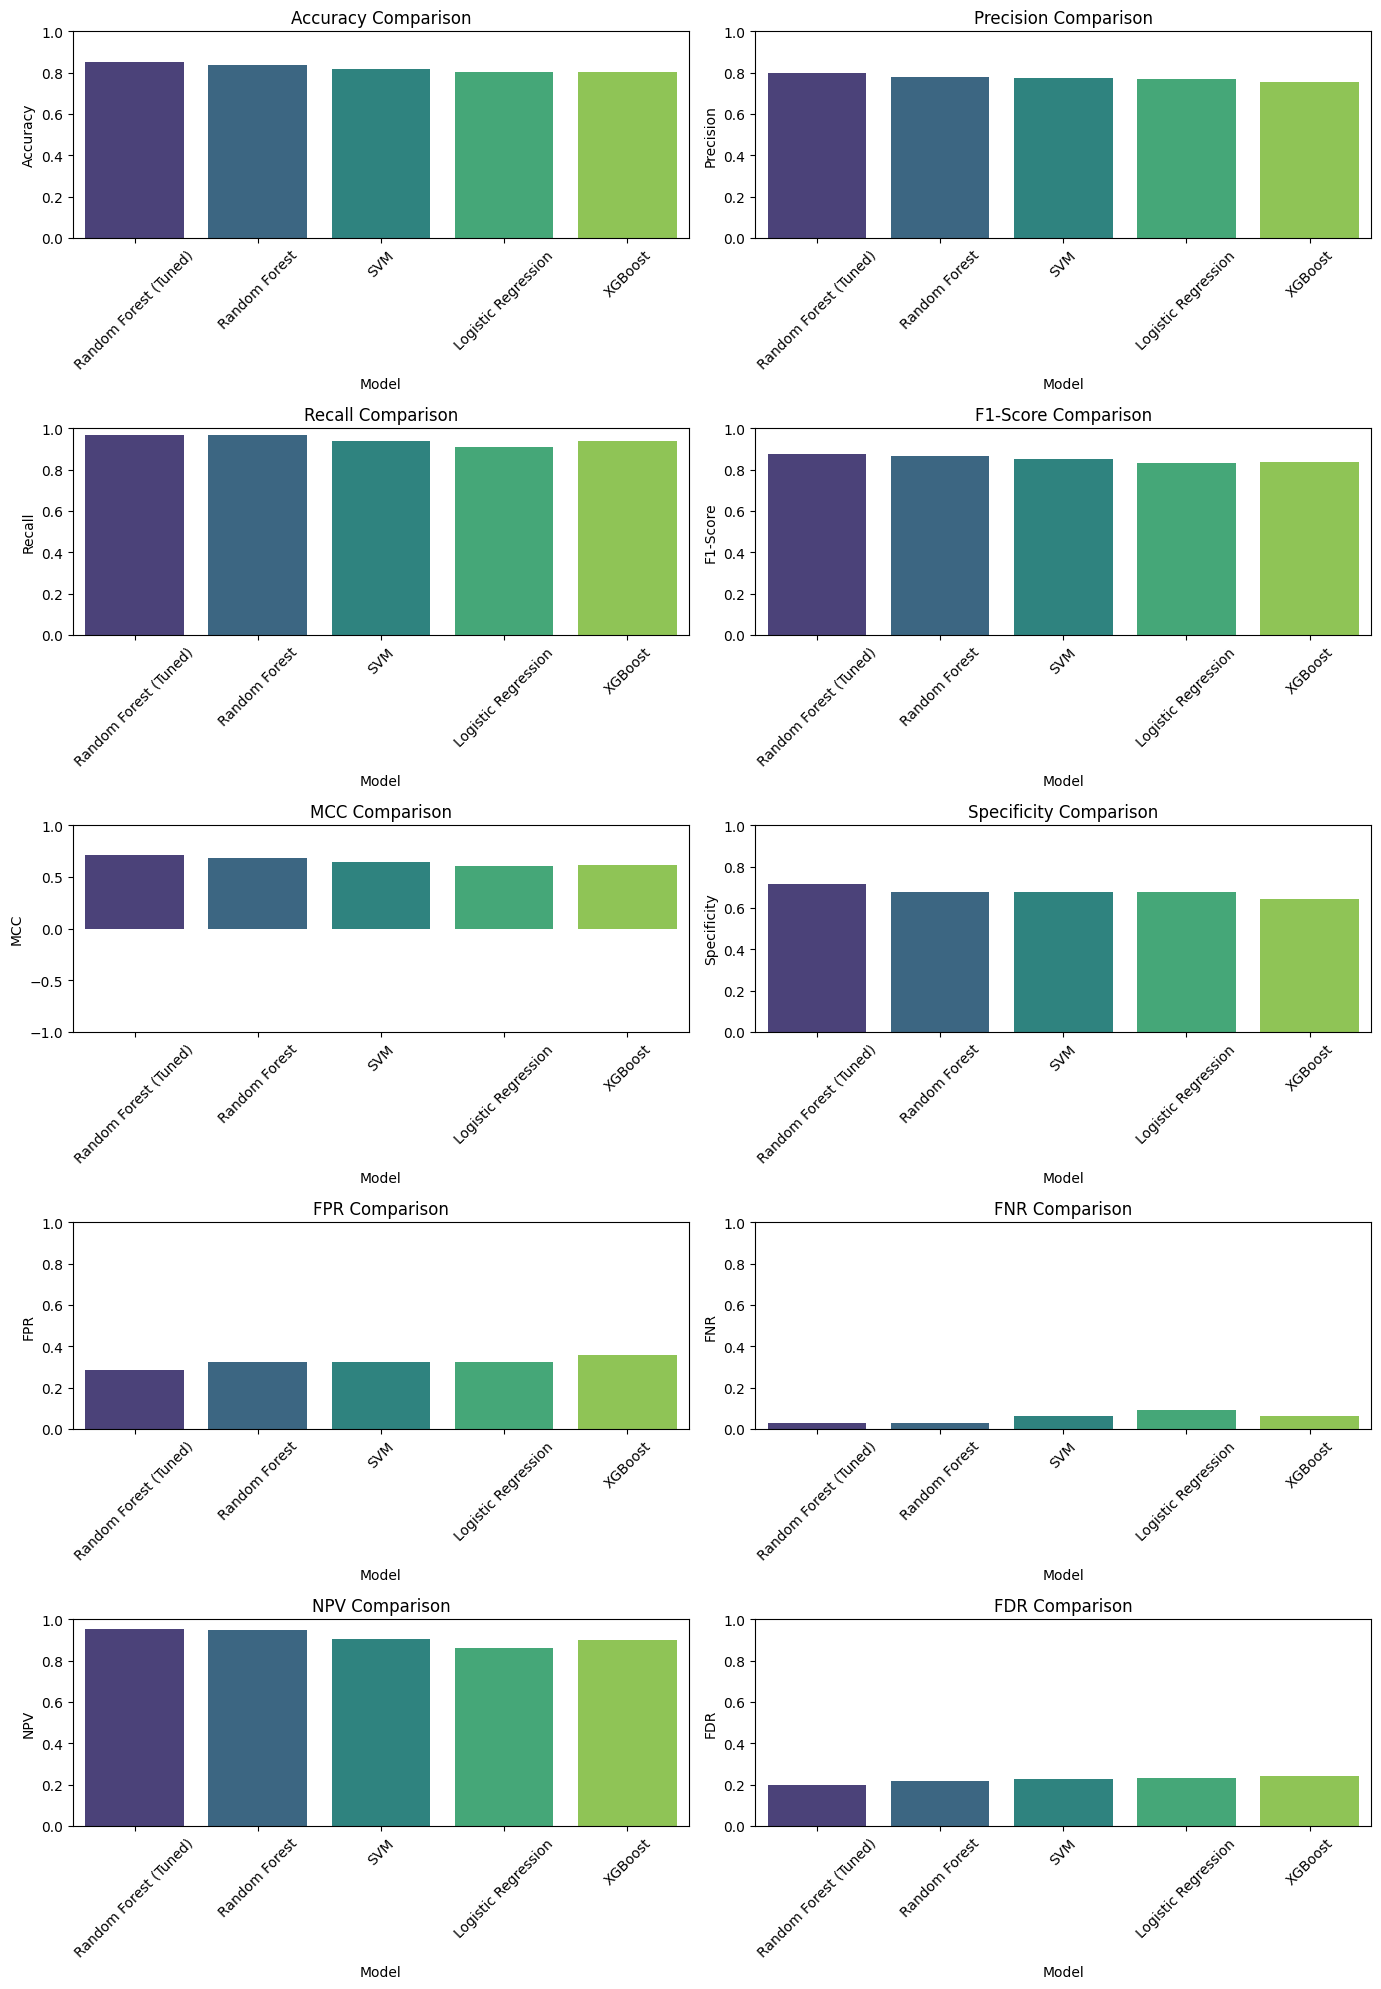


Evaluation metric plots saved as 'evaluation_metrics.png' in the output folder.


In [110]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n------- Model Comparison Table -------\n", results_df[["Model", "Accuracy", "Precision", "Recall", "F1-Score", "MCC", "Specificity", "FPR", "FNR", "NPV", "FDR"]])
results_df.to_csv(os.path.join("output", "model_comparison.csv"), index=False)
print("\nModel comparison saved as 'model_comparison.csv' in the output folder.")

# Plot of all metrics
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score", "MCC", "Specificity", "FPR", "FNR", "NPV", "FDR"]
n_metrics = len(metrics_to_plot)
n_cols = 2
n_rows = (n_metrics // n_cols) + (n_metrics % n_cols > 0)

plt.figure(figsize=(14, n_rows * 4))
for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.barplot(x="Model", y=metric, data=results_df, hue="Model", palette="viridis", legend=False)
    plt.title(f"{metric} Comparison")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.ylim(-1, 1) if metric == "MCC" else plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(os.path.join("output", "evaluation_metrics.png"), dpi=300, bbox_inches="tight")
plt.show()
print("\nEvaluation metric plots saved as 'evaluation_metrics.png' in the output folder.")


#### Training Visualisation

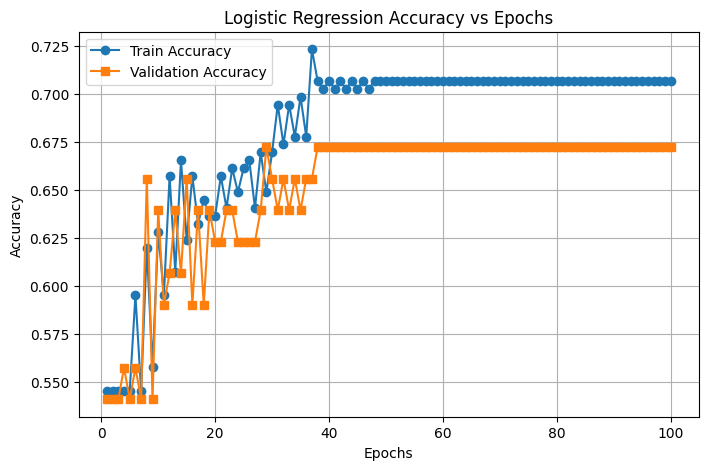

In [27]:
# Logistic Regression Training and Accuracy vs. Epochs
log_reg = LogisticRegression(max_iter=1, warm_start=True)  # Warm start to train iteratively
train_acc = []
val_acc = []
for epoch in range(1, 101):
    log_reg.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, log_reg.predict(X_train)))
    val_acc.append(accuracy_score(y_test, log_reg.predict(X_test)))
plt.figure(figsize=(8, 5))
plt.plot(range(1, 101), train_acc, label='Train Accuracy', marker='o')
plt.plot(range(1, 101), val_acc, label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy vs Epochs')
plt.legend()
plt.grid()
plt.savefig("output/logistic_regression_accuracy_vs_epochs.png", dpi=300, bbox_inches="tight")
plt.show()

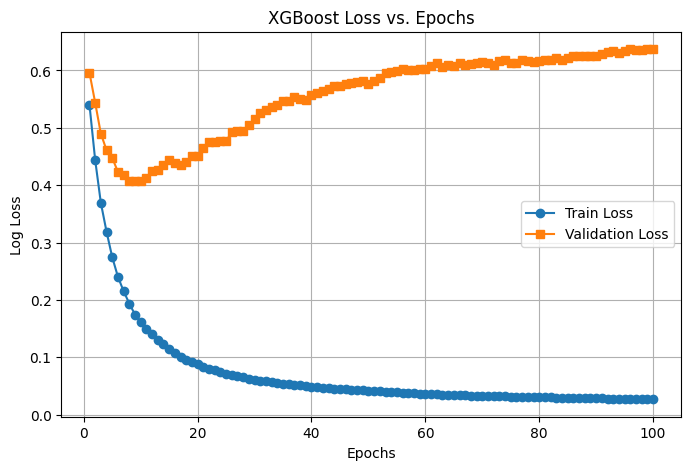

In [28]:
# XGBoost Training and Loss vs. Epochs
xgb_model = XGBClassifier(n_estimators=100, eval_metric='logloss', use_label_encoder=False)
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
# Extract Log Loss from XGBoost Training
results = xgb_model.evals_result()
xgb_train_loss = results['validation_0']['logloss']
xgb_val_loss = results['validation_1']['logloss']
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(xgb_train_loss) + 1), xgb_train_loss, label='Train Loss', marker='o')
plt.plot(range(1, len(xgb_val_loss) + 1), xgb_val_loss, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Loss vs. Epochs')
plt.legend()
plt.grid()
plt.show()

### Ensemble Prediction using Soft Voting (Probability Averaging)

- Averages the predicted probabilities & selects the class with the highest probability.


Test Accuracy: 0.819672131147541

------- Ensemble Model (Soft Voting Classifier) -------
Accuracy: 0.82
Precision: 0.76
Recall: 0.97
F1-Score: 0.85
MCC: 0.66
Specificity: 0.64
FPR: 0.36
FNR: 0.03
NPV: 0.95
FDR: 0.24

Confusion Matrix:
 [[18 10]
 [ 1 32]]


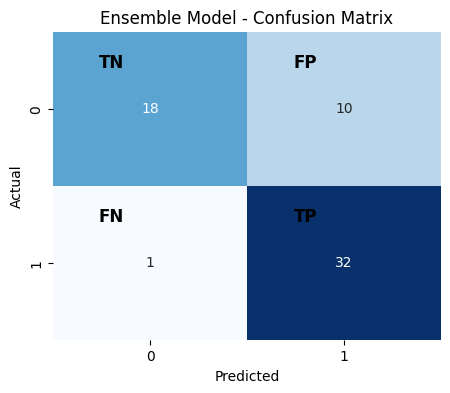

In [29]:
# Create a voting classifier with soft voting

base_models = [
    ("lr", LogisticRegression(random_state=42, max_iter=1000)),
    ("rf", RandomForestClassifier(random_state=42)),
    ("rf_best", best_rf),  # Use the best tuned Random Forest
    ("svm", SVC(probability=True, random_state=42)),  # SVM needs probability=True for soft voting
    ("xgb", XGBClassifier(eval_metric="logloss", random_state=42))
]

voting_clf = VotingClassifier(estimators=base_models, voting="soft") # Initialize ensemble model with soft voting
voting_clf.fit(X_train_scaled, y_train) # Train - ensemble model
y_pred_ensemble = voting_clf.predict(X_test_scaled) # Predict - ensemble model
print("Test Accuracy:", voting_clf.score(X_test_scaled, y_test))

# Compute confusion matrix & metrics
ensemble_confusion_matrix = confusion_matrix(y_test, y_pred_ensemble)
metrics = calculate_metrics(ensemble_confusion_matrix)
print("\n------- Ensemble Model (Soft Voting Classifier) -------")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:.2f}")
print("\nConfusion Matrix:\n", ensemble_confusion_matrix)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
ax = sns.heatmap(ensemble_confusion_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.text(0.3, 0.2, "TN", ha="center", va="center", color="black", fontsize=12, fontweight="bold")  # TN
plt.text(1.3, 0.2, "FP", ha="center", va="center", color="black", fontsize=12, fontweight="bold")  # FP
plt.text(0.3, 1.2, "FN", ha="center", va="center", color="black", fontsize=12, fontweight="bold")  # FN
plt.text(1.3, 1.2, "TP", ha="center", va="center", color="black", fontsize=12, fontweight="bold")  # TP
plt.title("Ensemble Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("output/ensemble_confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

### Save the Scaler while training

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialise & fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Save the scaler
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as 'scaler.pkl'")

Scaler saved as 'scaler.pkl'


### Save the Model

In [31]:
with open("ensemble_model.pkl", "wb") as f:
    pickle.dump(voting_clf, f)
print("Model saved as 'ensemble_model.pkl'")

Model saved as 'ensemble_model.pkl'


### Predict using own Values

In [ ]:
# Load the trained ensemble model
with open("ensemble_model.pkl", "rb") as f:
    voting_clf = pickle.load(f)
# Load scaler (used to scale the inputs
scaler = joblib.load("scaler.pkl")

# Define input widgets for user input (modify according to your dataset features)
feature_inputs = {
    "age": widgets.FloatText(description="Age:"),
    "sex": widgets.IntSlider(description="Sex:", min=0, max=1),  # 0 = Female, 1 = Male
    "cp": widgets.IntSlider(description="Chest Pain:", min=0, max=3),  # Chest pain type (0-3)
    "trestbps": widgets.FloatText(description="Resting Blood Pressure:"),
    "chol": widgets.FloatText(description="Cholesterol:"),
    "fbs": widgets.IntSlider(description="FBS > 120 mg/dl:", min=0, max=1),  # Fasting blood sugar
    "restecg": widgets.IntSlider(description="Rest ECG:", min=0, max=2),  # Resting ECG results
    "thalach": widgets.FloatText(description="Max Heart Rate:"),
    "exang": widgets.IntSlider(description="Exercise:", min=0, max=1),
    "oldpeak": widgets.FloatText(description="ST Depression:"),
    "slope": widgets.IntSlider(description="Slope:", min=0, max=2),
    "ca": widgets.IntSlider(description="Major Vessels (0-3):", min=0, max=3),
    "thal": widgets.IntSlider(description="Thalassemia Type:", min=0, max=3)  # 1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect
}

# Prediction function
def make_prediction(_):
    # user_input = np.array([[70, 1, 2, 160, 269, 0, 1, 112, 1, 2.9, 1, 1, 3]]) # => 0
    # user_input = np.array([[49, 1, 2, 118, 149, 0, 0, 126, 0, 0.8, 2, 3, 2]]) # => 1
    user_input = np.array([[w.value for w in feature_inputs.values()]])
    user_input_scaled = scaler.transform(user_input)
    prediction = voting_clf.predict(user_input_scaled)
    print(f"\nPredicted Outcome: {prediction[0]}")

# Display input fields
input_box = widgets.VBox(list(feature_inputs.values()))
display(input_box)

# Predict button
predict_button = widgets.Button(description="Predict")
predict_button.on_click(make_prediction)
display(predict_button)

# Example inputs:
# [54, 0, 2, 160, 201, 0, 1, 163, 0, 0, 2, 1, 2] => 1
# [70, 1, 2, 160, 269, 0, 1, 112, 1, 2.9, 1, 1, 3] => 0
# [49, 1, 2, 118, 149, 0, 0, 126, 0, 0.8, 2, 3, 2]  => 1


Button(description='Predict', style=ButtonStyle())